In [1]:
from astropy.io import fits
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
from simple_veloce_reduction import veloce_config, veloce_logs, veloce_extraction, veloce_reduction_tools, veloce_diagnostic

Set up info about run and target(s)

In [3]:
data_dirs = {'red': 'ccd_3', 'green': 'ccd_2', 'blue': 'ccd_1'}

In [4]:
config, veloce_paths = veloce_config.load_config('config.yaml')
science_targets = config['science_targets']

In [5]:
# config = {
#     'reduce': "file", # 'night', 'run', 'file'
#     'run': "CSV_Run",
#     'date': "230826", # date of the observation (YYMMDD), if reduce is 'night' or 'file'
#     'filename': "26aug20155.fits", # name of the file to reduce, if reduce is 'file'
#     'science_targets': "targets.dat", # file containg list of science targets
#     'calib_type': "Static", # Wavelength calibration to use SimLC, SimThXe, Interpolate or Static
#     # secondary information for the reduction
#     'arm': "green", # Which arm to reduce 'all', 'red', 'green' or 'blue'
#     'amplifier_mode': 4, # 2 or 4
#     'sim_calib': True, # Flag indicating if simultaneous ca True or False
#     'plot_diagnostic': True, # True or False
#     'scattered_light': False, # try to remove scattered light True or False
#     'flat_field': False, # True or False

#     # part responsible for the paths
#     'input_dir': os.path.join(os.getcwd(), "Data", "Raw", "CSV_Run"), # path to the directory with raw data (one in which the run directory is, i.e. input directory)
#     'output_dir': os.path.join(os.getcwd(), "Data", "Extracted", "CSV_Run"), # path to the directory where extracted data will be stored (i.e. output directory)
#     # below are paths where code will stor intermediet files and diagnostics
#     # by default they are set as subdirectories of output directory with extracted data
#     'blaze_dir': "Default",
#     'master_dir': "Default",
#     'wavelength_calibration_dir': "Default",
#     # 'obs_list_dir': "Default",
#     'plot_dir': "Default",
#     'log_dir': "Default",
#     # below are paths where code will look for internal files
#     # leave as default unless you know what you are doing
#     # veloce_reduction_dir: Default
#     'trace_dir': "Default", # path to the directory with traces to be extracted
#     'wave_dir': "Default", # path to the directory static wavelength solution
# }

# veloce_paths = veloce_config.VelocePaths.from_config(config)
# science_targets = veloce_config.load_target_list(config['science_targets'])

In [6]:
#WASP189b - new wave solution
config = {
    'reduce': "run", # 'night', 'run', 'file'
    'run': "WASP189b",
    'date': "240410", # date of the observation (YYMMDD), if reduce is 'night' or 'file'
    'filename': "run", # name of the file to reduce, if reduce is 'file'
    'science_targets': "WASP-189b.dat", # file containg list of science targets
    'calib_type': "Static", # Wavelength calibration to use SimLC, SimThXe, Interpolate or Static
    # secondary information for the reduction
    'arm': "all", # Which arm to reduce 'all', 'red', 'green' or 'blue'
    'amplifier_mode': 2, # 2 or 4
    'sim_calib': True, # Flag indicating if simultaneous calibrations are used True or False
    'plot_diagnostic': True, # True or False
    'scattered_light': False, # try to remove scattered light True or False
    'flat_field': True, # True or False

    # part responsible for the paths
    'input_dir': os.path.join("/home/usqobserver2/VeloceData/WASP189b/"), # path to the directory with raw data (one in which the run directory is, i.e. input directory)
    'output_dir': os.path.join("/home/usqobserver2/Joachim_veloce/Extracted_data", "WASP189b_new_trace"), # path to the directory where extracted data will be stored (i.e. output directory)
    # below are paths where code will stor intermediet files and diagnostics
    # by default they are set as subdirectories of output directory with extracted data
    # blaze_dir: Default
    'master_dir': 'Default', # directory for master images for night/run
    'wavelength_calibration_dir': 'Default', # directory for wavelength calibration related files for the night/run
    'trace_shift_dir': 'Default', # TODO: add to the code
    'plot_dir': 'Default', # directory for diagnostic plots

    # below are paths where the code will look for internal files
    # leave as default unless you know what you are doing
    # veloce_reduction_dir: Default
    'trace_dir': 'Default', # path to the directory with traces to be extracted
    'trace_file': 'Default', # filename of the file with traces to be extracted
    'wave_dir': 'Default', # path to the directory with reference wavelength solution
}

veloce_paths = veloce_config.VelocePaths.from_config(config)
# science_targets = veloce_config.load_target_list(config['science_targets'])
science_targets = ['WASP-189b']

In [7]:
# run = "CSV_Run"
# veloce_paths = veloce_config.VelocePaths(run)
# veloce_paths.__post_init__()

# science_targets = ['HD20203-USQ01']

# arm = 'green'

# # Days and dates are redundant, should make one automatically generated from the other
# dates = ['230826'] # can be drawn from dirs present in the run directory
# days = ['26aug'] 

Step 1 - read data filenames from logs

In [8]:
obs_list = veloce_logs.load_run_logs(science_targets, config['arm'], veloce_paths=veloce_paths)

In [9]:
# for day, date in zip(days, dates):
#     log_path = os.path.join(veloce_paths.raw_parent_dir, run, date)
#     log_name = [name for name in os.listdir(log_path) if name.split('.')[-1] == 'log'][0]
#     log_path = os.path.join(log_path, log_name)
#     temp_obs_list = veloce_logs.load_log_info(log_path, science_targets, arm, day, calib_type)
#     for key in temp_obs_list:
#         obs_list[key][date] = temp_obs_list[key]

Step 2 - save targets list

In [10]:
obs_list = veloce_logs.get_obs_list(obs_list['science'])
#  obs_list_name = veloce_logs.save_science_target_list(obs_list['science'], run=config['run'])
# can be done also by target
# and with custom filename for resulting file

In [11]:
obs_list

{'240410': [['WASP-189b', '10apr30105.fits'],
  ['WASP-189b', '10apr20105.fits'],
  ['WASP-189b', '10apr10105.fits'],
  ['WASP-189b', '10apr30106.fits'],
  ['WASP-189b', '10apr20106.fits'],
  ['WASP-189b', '10apr10106.fits'],
  ['WASP-189b', '10apr30107.fits'],
  ['WASP-189b', '10apr20107.fits'],
  ['WASP-189b', '10apr10107.fits'],
  ['WASP-189b', '10apr30108.fits'],
  ['WASP-189b', '10apr20108.fits'],
  ['WASP-189b', '10apr10108.fits'],
  ['WASP-189b', '10apr30109.fits'],
  ['WASP-189b', '10apr20109.fits'],
  ['WASP-189b', '10apr10109.fits'],
  ['WASP-189b', '10apr30110.fits'],
  ['WASP-189b', '10apr20110.fits'],
  ['WASP-189b', '10apr10110.fits'],
  ['WASP-189b', '10apr30111.fits'],
  ['WASP-189b', '10apr20111.fits'],
  ['WASP-189b', '10apr10111.fits'],
  ['WASP-189b', '10apr30112.fits'],
  ['WASP-189b', '10apr20112.fits'],
  ['WASP-189b', '10apr10112.fits'],
  ['WASP-189b', '10apr30113.fits'],
  ['WASP-189b', '10apr20113.fits'],
  ['WASP-189b', '10apr10113.fits'],
  ['WASP-189b', '1

In [12]:
def extract_run(target_list, config, veloce_paths, obs_list):
    """
    Extracts spectral data from Veloce observations for a specific run without applying blaze correction.
    
    This function processes observation data for a specific run and spectrograph arm from Veloce.
    It loads wave calibration data, trace data, and modifies summing ranges based on the
    specified arm. The function is designed to work with 'green', 'red', and 'blue' arms.

    Parameters:
    - target_list (dict): A dictionary containing observation targets grouped by date.
    - config (dict): Configuration settings for the extraction process, including arm, amplifier mode, calibration type, etc.
    - veloce_paths (VelocePaths): An object containing paths to Veloce data directories.
    - obs_list (list): A list of observation metadata for the run.

    Raises:
    - ValueError: If an unsupported arm is specified.

    Notes:
    - The function assumes a standard directory structure for storing Veloce data and extracted data.
    - Wave calibration is based on pre-fitted Thorium-Argon (ThAr) lamp observations.
    - Trace data is loaded from a predefined location and may need adjustments for summing ranges,
      especially if the spectrograph setup has been altered.

    Returns:
    None. The function is designed to perform data extraction and processing, with outputs
    saved to files (used in further processing).
    """
    arm_nums = {'red': 3, 'green': 2, 'blue': 1}
    # pick which arm to reduce
    if config['arm'] in data_dirs.keys():
        arms = [config['arm']]
    elif config['arm'] == 'all':
        arms = data_dirs.keys()
    else:
        raise ValueError('Unsupported arm')
    
    for arm in arms:
        print(arm)
        ccd = data_dirs[arm]
        ### load traces
        traces = veloce_extraction.load_trace_data(arm, veloce_paths.trace_dir, sim_calib=config['sim_calib'], filename=config['trace_file'])
        
        if config['calib_type'] == 'Static':
            ### load static wave calibration based on ThAr
            # ORDER, COEFFS, MATCH_LAM, MATCH_PIX, MATCH_LRES, GUESS_LAM, Y0 = \
            #     veloce_reduction_tools.load_prefitted_wave(
            #         arm=arm, wave_calib_slice=traces.wave_calib_slice, wave_path=veloce_paths.wave_dir)
            # static_wave = veloce_reduction_tools.calibrate_orders_to_wave(None, Y0, COEFFS, traces=traces)
            print(os.path.join(veloce_paths.wave_dir, f'ThXe_wave_{config['date']}_{arm}.pkl'))
            static_wave = pickle.load(open(os.path.join(veloce_paths.wave_dir, f'ThXe_wave_{config['date']}_{arm}.pkl'), 'rb'))
        # elif config['calib_type'] == 'Interpolate':
        #     wave_interp_base = veloce_wavecalib.load_wave_calibration_for_interpolation(target_list, obs_list, veloce_paths)
        else:
            pass #load LC reference

        for date in target_list.keys(): 
            # if config['flat_field']:
            #     flat = veloce_extraction.get_flat(config, veloce_paths, arm, config['amplifier_mode'], date, obs_list)
                
            for obs in target_list[date]:
                target, filename = obs
                if int(filename[5]) == arm_nums[arm]:
                    print(target, filename)
                    spectrum_filename =  os.path.join(veloce_paths.input_dir, date, ccd, filename)
                    with fits.open(spectrum_filename) as hdul:
                        image_data = hdul[0].data
                        hdr = hdul[0].header

                        image_subtracted_bias = veloce_reduction_tools.remove_overscan_bias(
                            image_data, hdr, arm, config['amplifier_mode'], overscan_range=32)
                        
                        # if config['flat_field']:
                        #     image_subtracted_bias, hdr = veloce_reduction_tools.flat_field_correction(image_subtracted_bias, flat, hdr)
                        
                        # if config['scattered_light']:
                        #     image_subtracted_bias, hdr = remove_scattered_light(image_subtracted_bias, hdr, traces)
                        
                        extracted_science_orders, extracted_order_imgs = veloce_reduction_tools.extract_orders_with_trace(
                            image_subtracted_bias, traces, remove_background=False)
                        
                        if config['calib_type'] == 'Static':
                            # vacuum_wave = static_wave
                            final_wave = static_wave
                            final_flux = extracted_science_orders
                        else:
                            raise ValueError("You entered non-Static calib mode but expect only Static!")
                        # elif config['calib_type'] == 'Interpolate':
                        #     vacuum_wave, final_flux = veloce_wavecalib.interpolate_wave(
                        #         extracted_science_orders, hdr)
                        # elif config['calib_type'] == 'SimThXe':
                        #     vacuum_wave = veloce_wavecalib.calibrate_simTh(
                        #         extracted_science_orders, hdr)
                        #     final_flux = extracted_science_orders
                        # elif config['calib_type'] == 'SimLC':
                        #     vacuum_wave, final_flux = veloce_wavecalib.calibrate_simLC(
                        #         extracted_science_orders, veloce_paths, image_subtracted_bias,
                        #         hdr, arm, plot=config['plot_diagnostic'], filename=filename)
                        
                        # final_wave = [veloce_reduction_tools.vacuum_to_air(wave) for wave in vacuum_wave]
                        
                        if config['plot_diagnostic']:
                            veloce_diagnostic.plot_order_cross_section(
                                image_subtracted_bias, traces, 10, filename,
                                veloce_paths, plot_type='median')
                            # if config['flat_field']:
                            #     veloce_diagnostic.plot_extracted_2D_order(
                            #         extracted_order_imgs, order=10, traces=traces, filename=filename,
                            #         veloce_paths=veloce_paths, flatfielded=True, flatfield=flat)
                            # else:
                            veloce_diagnostic.plot_extracted_2D_order(
                                extracted_order_imgs, order=10, traces=traces, filename=filename,
                                veloce_paths=veloce_paths)

                        # save extracted spectrum as fits file
                        fits_filename = os.path.join(veloce_paths.output_dir, f"{target}_veloce_{arm}_{filename}")
                        veloce_reduction_tools.save_extracted_spectrum_fits(
                            filename=fits_filename, wave=final_wave, flux=final_flux, hdr=hdr)

Step 3 - Extract science data


In [13]:
# output_path = veloce_paths.extracted_parent_dir
extract_run(obs_list, config, veloce_paths, obs_list)

red
/home/usqobserver2/Joachim_veloce/veloce_reduction_dev/veloce_reduction/Wave/ThXe_wave_240410_red.pkl
WASP-189b 10apr30105.fits
Gain for amplifier 3 not found in header.
Gain for amplifier 4 not found in header.
Gain for half 1: 1.01
Gain for half 2: 1.040502
WASP-189b 10apr30106.fits
Gain for amplifier 3 not found in header.
Gain for amplifier 4 not found in header.
Gain for half 1: 1.01
Gain for half 2: 1.040502
WASP-189b 10apr30107.fits
Gain for amplifier 3 not found in header.
Gain for amplifier 4 not found in header.
Gain for half 1: 1.01
Gain for half 2: 1.040502
WASP-189b 10apr30108.fits
Gain for amplifier 3 not found in header.
Gain for amplifier 4 not found in header.
Gain for half 1: 1.01
Gain for half 2: 1.040502
WASP-189b 10apr30109.fits
Gain for amplifier 3 not found in header.
Gain for amplifier 4 not found in header.
Gain for half 1: 1.01
Gain for half 2: 1.040502
WASP-189b 10apr30110.fits
Gain for amplifier 3 not found in header.
Gain for amplifier 4 not found in he

In [15]:
# veloce_extraction.extract_single_file(config['filename'], config, veloce_paths, obs_list)

In [16]:
veloce_paths.output_dir

'/home/usqobserver2/Joachim_veloce/Extracted_data/WASP189b_new_trace'

In [32]:
filename = 'WASP-189b_veloce_blue_10apr10105.fits'
# filename = 'WASP-189b_veloce_green_10apr20105.fits'
# filename = 'WASP-189b_veloce_red_10apr30105.fits'
# filename = os.listdir(veloce_paths.output_dir)[0]
wave, flux, hdr = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join(veloce_paths.output_dir, filename))
old_wave, old_flux, old_hdr = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join("/home/usqobserver2/Joachim_veloce/Extracted_data/WASP189b_old", filename))
new_wave, new_flux, new_hdr = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join("/home/usqobserver2/Joachim_veloce/Extracted_data/WASP189b", filename))

In [18]:
old_extraction_dir = "/home/usqobserver2/Joachim_veloce/Extracted_data/WASP189b_old/"

In [ ]:
# for filename in os.listdir(veloce_paths.output_dir):
#     if filename[-5:] == '.fits':
#         wave, _, hdr = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join(veloce_paths.output_dir, filename))
#         _, flux, _ = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join(old_extraction_dir, filename))
#         for w, f in zip(wave, flux):
#             if len(w) != len(f):
#                 print("error")
#         fits_filename = os.path.join(veloce_paths.output_dir, filename)
#         veloce_reduction_tools.save_extracted_spectrum_fits(
#                                 filename=fits_filename, wave=wave, flux=flux, hdr=hdr)    

In [20]:
from scipy.ndimage import median_filter

In [21]:
%matplotlib widget

Text(0, 0.5, 'Flux [ADU]')

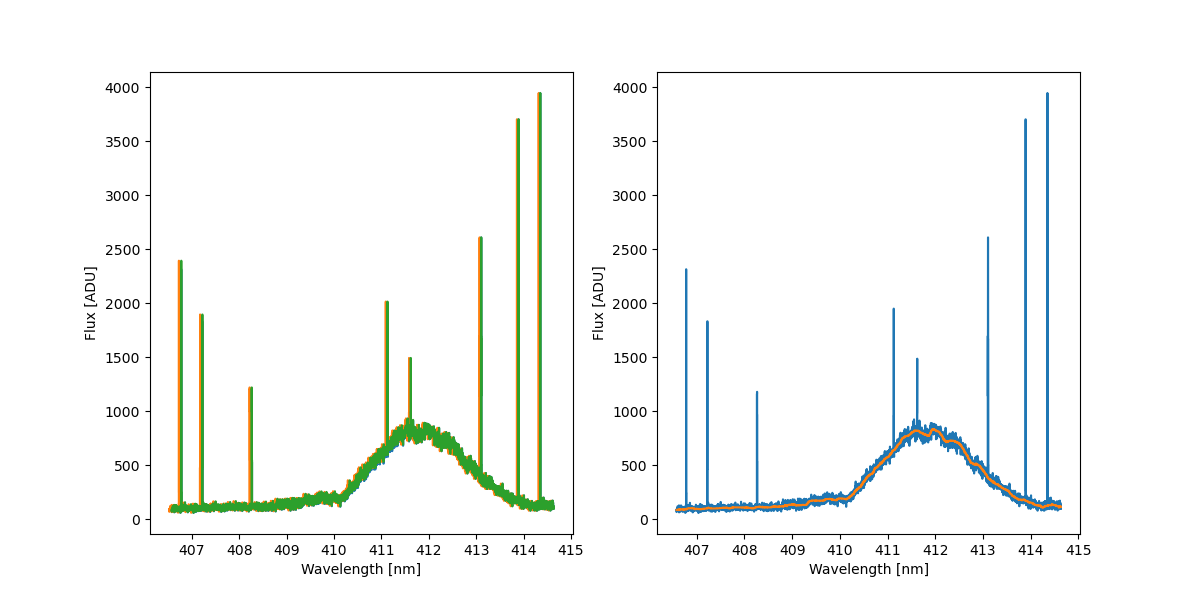

In [33]:
order = 10
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].step(wave[order], flux[order], where='mid')
ax[0].step(old_wave[order], old_flux[order], where='mid')
ax[0].step(new_wave[order], new_flux[order], where='mid')
ax[0].set_xlabel('Wavelength [nm]')
ax[0].set_ylabel('Flux [ADU]')
ax[1].step(wave[order], flux[order], where='mid')
ax[1].step(wave[order], median_filter(flux[order], 51), where='mid')
mask = flux[order] - median_filter(flux[order], 51) < median_filter(flux[order], 51) + 1.5*np.std(flux[order] - median_filter(flux[order], 51))
ax[1].step(wave[order][mask], flux[order][mask], where='mid')

# plt.xlim(588.89, 590.09)
# plt.ylim(1000, 10000)
ax[1].set_xlabel('Wavelength [nm]')
ax[1].set_ylabel('Flux [ADU]')

In [34]:
flux_order = flux[order][~np.isnan(flux[order])]
mask = flux[order] - median_filter(flux[order], 51) < median_filter(flux[order], 51) + 1.5*np.std(flux[order] - median_filter(flux[order], 51))
print(np.std(flux[order][mask]-median_filter(flux[order][mask], 51)))

nan


/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [25]:
np.any(np.isnan(old_flux[order]))

True

In [24]:
mask = old_flux[order] - median_filter(old_flux[order], 51) < median_filter(old_flux[order], 51) + 1.5*np.std(old_flux[order] - median_filter(old_flux[order], 51))
print(np.std(old_flux[order][mask]-median_filter(old_flux[order][mask], 51)))

nan


In [74]:
blue_filename = 'WASP-189b_veloce_blue_10apr10105.fits'
green_filename = 'WASP-189b_veloce_green_10apr20105.fits'
red_filename = 'WASP-189b_veloce_red_10apr30105.fits'
# filename = os.listdir(veloce_paths.output_dir)[0]
blue_wave, blue_flux, blue_hdr = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join(veloce_paths.output_dir, blue_filename))
green_wave, green_flux, green_hdr = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join(veloce_paths.output_dir, green_filename))
red_wave, red_flux, red_hdr = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join(veloce_paths.output_dir, red_filename))


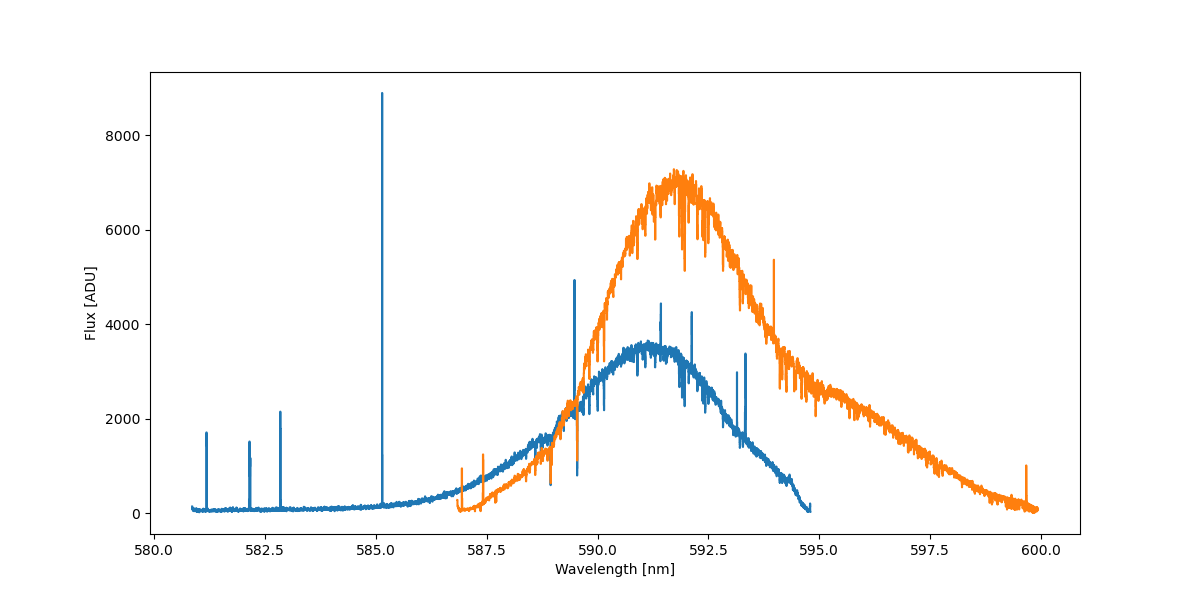

In [75]:
plt.close('all')
red_order = -1
green_order = 0
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.step(red_wave[red_order], red_flux[red_order], where='mid')
ax.step(green_wave[green_order], green_flux[green_order], where='mid')
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Flux [ADU]')
plt.show()

(optional) Step 4 - Make master flats (based on file list)

In [ ]:
master_type = f'flat_{config["arm"]}'
arm = config['arm']
run = config['run']

for date in obs_list[master_type].keys():
    if obs_list[master_type][date] != []:
        master_flat, hdr = veloce_reduction_tools.get_master(obs_list,
                            master_type, veloce_paths.raw_parent_dir, run, date, arm)
        master_flat_filename =  f'master_{master_type}_{date}.fits'
        veloce_reduction_tools.save_image_fits(master_flat_filename, veloce_paths.master_dir, master_flat, hdr)

In [ ]:
arm = config['arm']
amplifier_mode = config['amplifier_mode']
run = config['run']
date = '230826'
master_type = f'flat_{config["arm"]}'
master_flat_filename =  f'master_{master_type}_{date}.fits'

In [9]:
with fits.open(os.path.join(veloce_paths.master_dir, master_flat_filename)) as hdul:
    master_flat = hdul[0].data
    hdr = hdul[0].header

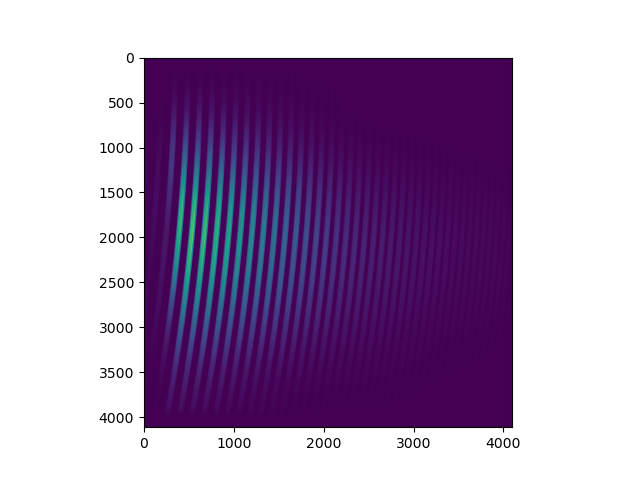

In [40]:
plt.imshow(master_flat)

In [ ]:
master_flat = veloce_reduction_tools.remove_overscan_bias(master_flat, hdr, arm, amplifier_mode, overscan_range=32)

Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.01
Gain for quadrant 3: 1.01
Gain for quadrant 4: 1.01


In [12]:
from scipy.ndimage import median_filter
from csaps import csaps

In [ ]:
def make_normalised_master_flat(master_filename, master_path, amplifier_mode):
    with fits.open(os.path.join(master_path, master_filename)) as hdul:
        flat_image = hdul[0].data
        hdr = hdul[0].header
    flat_subtracted_bias = veloce_reduction_tools.remove_overscan_bias(flat_image, hdr, arm, amplifier_mode, overscan_range=32)

    y = np.arange(flat_subtracted_bias.shape[0])
    smoothed_flat = np.array([csaps(y, flat_subtracted_bias[:, col], y, smooth=0.5) for col in range(flat_subtracted_bias.shape[1])]).T    
        
    normalised_flat = flat_subtracted_bias / (smoothed_flat)
    if np.any(normalised_flat <= 0):
        print(np.min(normalised_flat), np.sum(normalised_flat <= 0))
        normalised_flat[normalised_flat <= 0] = 1

    normalised_flat_name = master_filename.split('.')[0]+'_norm.fits'
    veloce_reduction_tools.save_image_fits(normalised_flat_name, master_path, normalised_flat, hdr)
    
    return normalised_flat, hdr, normalised_flat_name, smoothed_flat

In [62]:
norm_master_flat, header, norm_flat_filename, smoothed_flat = make_normalised_master_flat(master_flat_filename, veloce_paths.master_dir, 4)

Gain for quadrant 1: 1.01
Gain for quadrant 2: 1.01
Gain for quadrant 3: 1.01
Gain for quadrant 4: 1.01
-13.449875396848649 2


In [74]:
for y, x in zip(*np.where(master_flat == 0)):
    print(y, x)

1300 36
1301 36
1303 36
1304 36
1305 36
1306 36
1307 36
1308 36
1309 36
1312 36
1314 36
1316 36
3964 4095
3988 4079
4004 4087
4029 4076
4040 4071
4043 4079
4044 4089
4046 4095
4056 4089
4059 4090
4061 4057
4062 4083
4064 4080
4070 4090
4071 4070
4075 4065
4076 4073
4080 4092
4091 4073
4092 4085
4097 4026
4097 4081
4101 4085
4103 4046
4104 4080
4105 4067
4105 4077
4106 4089
4107 4084
4107 4091
4108 4078
4108 4092
4109 4095
4110 4067
4111 2
4111 6
4111 7
4111 9
4111 11
4111 17
4111 18
4111 19
4111 24
4111 28
4111 34
4111 35
4111 38
4111 39
4111 46
4111 49
4111 51
4111 63
4111 65
4111 68
4111 71
4111 74
4111 76
4111 77
4111 78
4111 80
4111 81
4111 82
4111 85
4111 89
4111 91
4111 92
4111 93
4111 99
4111 102
4111 103
4111 104
4111 105
4111 106
4111 107
4111 108
4111 110
4111 114
4111 115
4111 116
4111 117
4111 123
4111 124
4111 125
4111 129
4111 132
4111 136
4111 137
4111 138
4111 139
4111 141
4111 142
4111 149
4111 150
4111 152
4111 153
4111 154
4111 155
4111 156
4111 165
4111 166
4111 167

In [16]:
%matplotlib widget

In [63]:
plt.close('all')

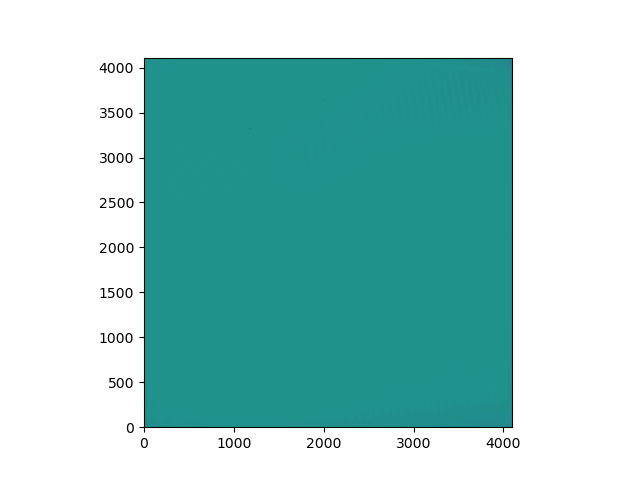

In [64]:
plt.imshow(norm_master_flat, origin='lower', cmap='viridis', norm='log', vmin=np.percentile(norm_master_flat, 5), vmax=np.percentile(norm_master_flat, 95))
# plt.imshow(norm_master_flat, origin='lower', cmap='viridis')#, vmin=np.min(norm_master_flat), vmax=np.max(norm_master_flat))

In [43]:
plt.close('all')

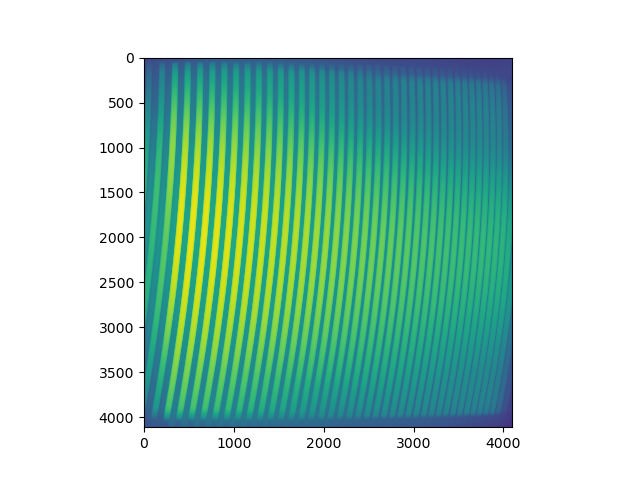

In [44]:
plt.imshow(smoothed_flat, cmap='viridis', norm='log') 

In [36]:
np.min(norm_master_flat), np.max(norm_master_flat), np.median(norm_master_flat), np.mean(norm_master_flat), np.std(norm_master_flat)

(-2.0917550292142564,
 2.5382415169197365,
 0.9999325919262448,
 0.9996738010159821,
 0.03513801797853616)

In [85]:
filename = os.path.join(veloce_paths.trace_dir, f'veloce_{arm}_4amp_no_sim_calib_trace.pkl')
traces = veloce_reduction_tools.Traces.load_traces(filename)

In [50]:
plt.close('all')

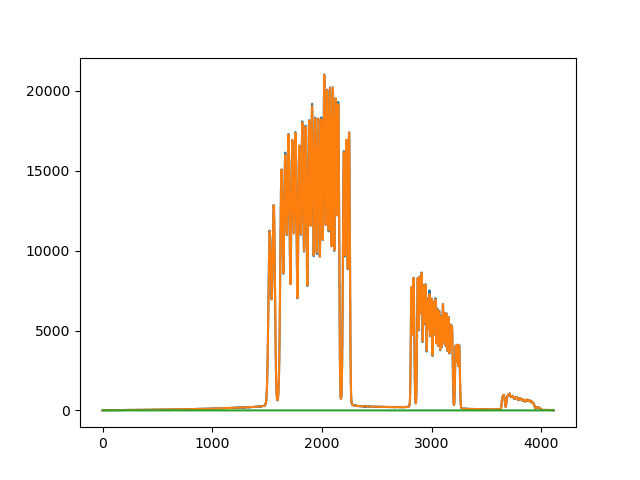

In [51]:
col = 1200
plt.step(np.arange(len(master_flat[:, col])), master_flat[:, col], where='mid')
plt.plot(np.arange(len(master_flat[:, col])), smoothed_flat[:, col])#, where='mid')
plt.step(np.arange(len(master_flat[:, col])), norm_master_flat[:, col], where='mid')

In [103]:
plt.close('all')

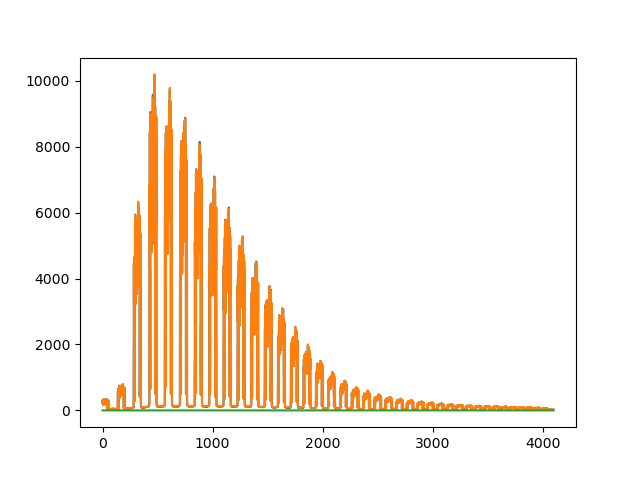

In [104]:
row = 1000
plt.step(np.arange(len(master_flat[row, :])), master_flat[row, :], where='mid')
plt.step(np.arange(len(master_flat[row, :])), smoothed_flat[row, :], where='mid')
plt.step(np.arange(len(master_flat[row, :])), norm_master_flat[row, :], where='mid')

In [35]:
extracted_master, extracted_master_img = veloce_reduction_tools.extract_orders_with_trace(master_flat, traces)
extracted_norm, extracted_norm_img = veloce_reduction_tools.extract_orders_with_trace(norm_master_flat, traces)

In [ ]:
veloce_reduction_tools.plot_order_cross_section

In [11]:
# veloce_extraction.extract_blaze(master_flat_filename, arm=f"{arm}")

In [38]:
plt.close('all')

In [39]:
%matplotlib inline